In [1]:
from plasma_classes import *
from plasma_utils import *

In [2]:
from matplotlib import pyplot as plt

In [3]:
import numpy as np

Достаточным условием для использования метода прогонки является диагональное преобладание матрицы системы:

In [4]:
A = np.array([[2, 1, 0, 0], 
             [1, 10, -5, 0], 
             [0, 1, -5, 2], 
             [0, 0, 1, 4]])

In [5]:
is_diagonally_dominant(A)

True

In [6]:
d = np.array([-5, -18, -40, -27])

In [7]:
thomas_algorithm(A, d)

array([-3.,  1.,  5., -8.])

In [8]:
N_x = 100; #количество ячеек
L = 1; #длина системы
h = L / N_x; #длина ячейки

In [9]:
grid = np.linspace(0, L, N_x+1)

In [10]:
nodes = Nodes(N_x)

In [11]:
nodes.rho *= 0

In [12]:
calc_fields(nodes, h, 1, periodic=True)

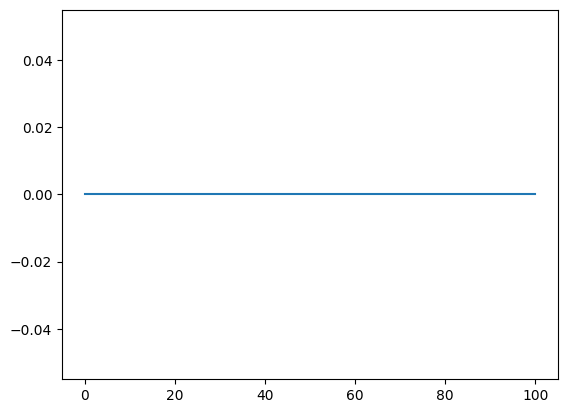

In [13]:
plt.plot(nodes.phi)

In [14]:
q = 2*np.pi*2

In [15]:
nodes.rho = np.sin(q*grid)

In [16]:
calc_fields(nodes, h, 1, periodic=True)

In [17]:
theory = np.sin(q*grid)/q**2

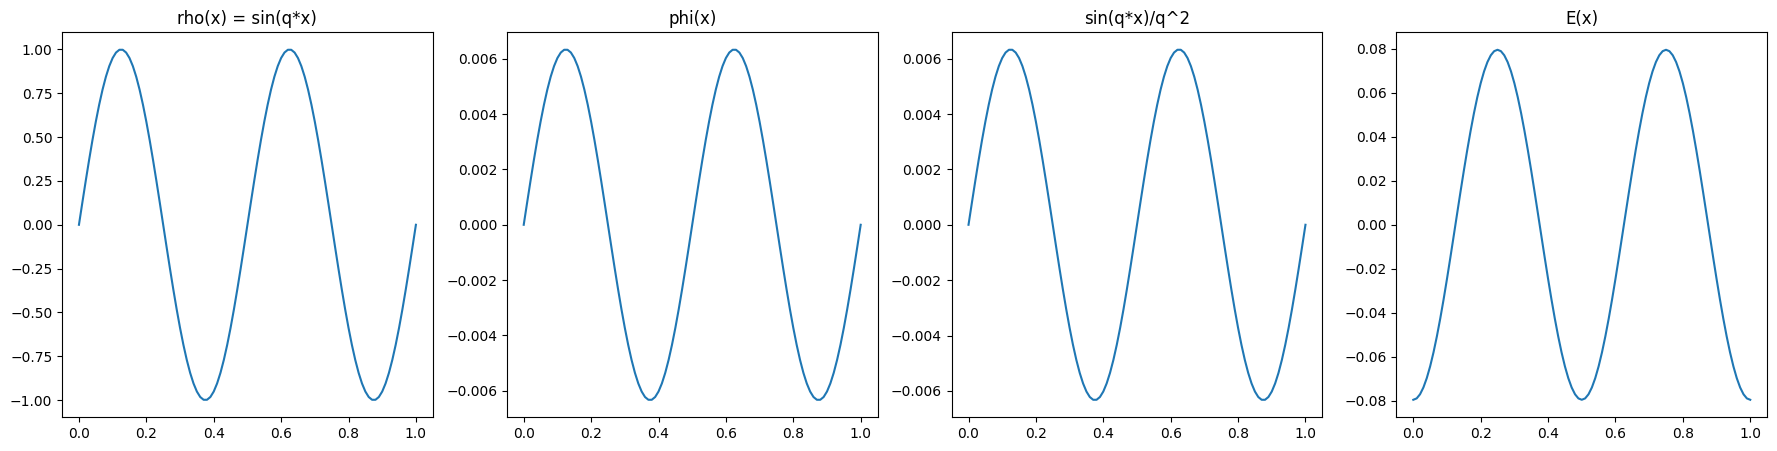

In [18]:
fig, ax = plt.subplots(1, 4)
ax[0].plot(grid, nodes.rho)
ax[0].set_title('rho(x) = sin(q*x)')
ax[1].plot(grid, nodes.phi)
ax[1].set_title('phi(x)')
ax[2].plot(grid, theory)
ax[2].set_title('sin(q*x)/q^2')
ax[3].plot(grid, nodes.E)
ax[3].set_title('E(x)')

fig.set_size_inches((22, 5))
%matplotlib inline

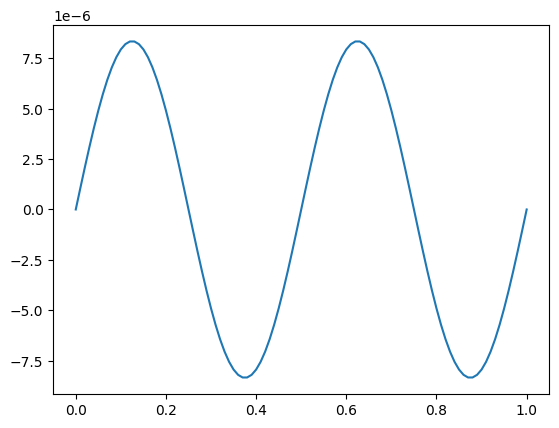

In [19]:
plt.plot(grid, (nodes.phi-theory))

In [20]:
nodes.rho = -(6*grid-2)

In [21]:
calc_fields(nodes, h, 1, periodic=True)

In [22]:
theory = grid**3 - grid**2

In [23]:
e_theory = -3*grid**2 + 2*grid

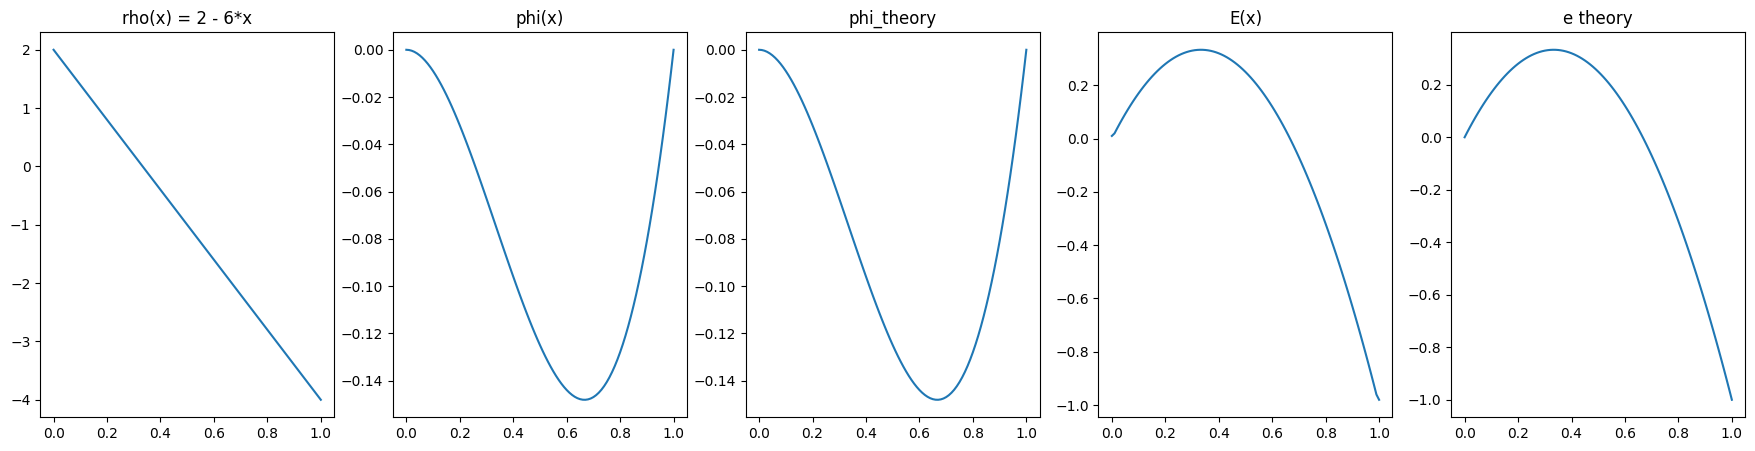

In [24]:
fig, ax = plt.subplots(1, 5)
ax[0].plot(grid, nodes.rho)
ax[0].set_title('rho(x) = 2 - 6*x')
ax[1].plot(grid, nodes.phi)
ax[1].set_title('phi(x)')
ax[2].plot(grid, theory)
ax[2].set_title('phi_theory')

ax[3].plot(grid, nodes.E)
ax[3].set_title('E(x)')

ax[4].plot(grid, e_theory)
ax[4].set_title('e theory')

fig.set_size_inches((22, 5))
%matplotlib inline

C:\Users\setup\AppData\Local\Temp\ipykernel_11756\3114982408.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(grid, (nodes.phi-theory)/nodes.phi)


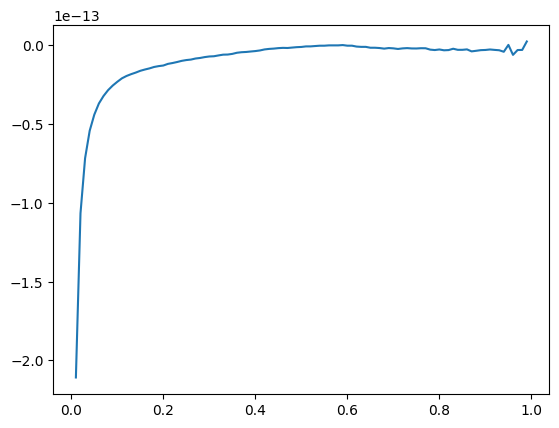

In [59]:
plt.plot(grid, (nodes.phi-theory)/nodes.phi)

In [60]:
top = 0.3333
bottom = -1

In [61]:
N_x = 10000; #количество ячеек
L = 10; #длина системы
h = L / N_x; #длина ячейки

grid = np.linspace(0, L, N_x+1)

In [62]:
nodes = Nodes(N_x)

In [63]:
nodes.rho = np.zeros(grid.shape)
nodes.rho[int(0.2*N_x):int(0.8*N_x)] = top
nodes.rho[:int(0.1*N_x)] = nodes.rho[int(0.9*N_x)+1:] = 0
nodes.rho[int(0.1*N_x):int(0.2*N_x)] = nodes.rho[int(0.8*N_x):int(0.9*N_x)] = bottom

In [64]:
%timeit -r1 calc_fields(nodes, h, 1, periodic=True)

10.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)


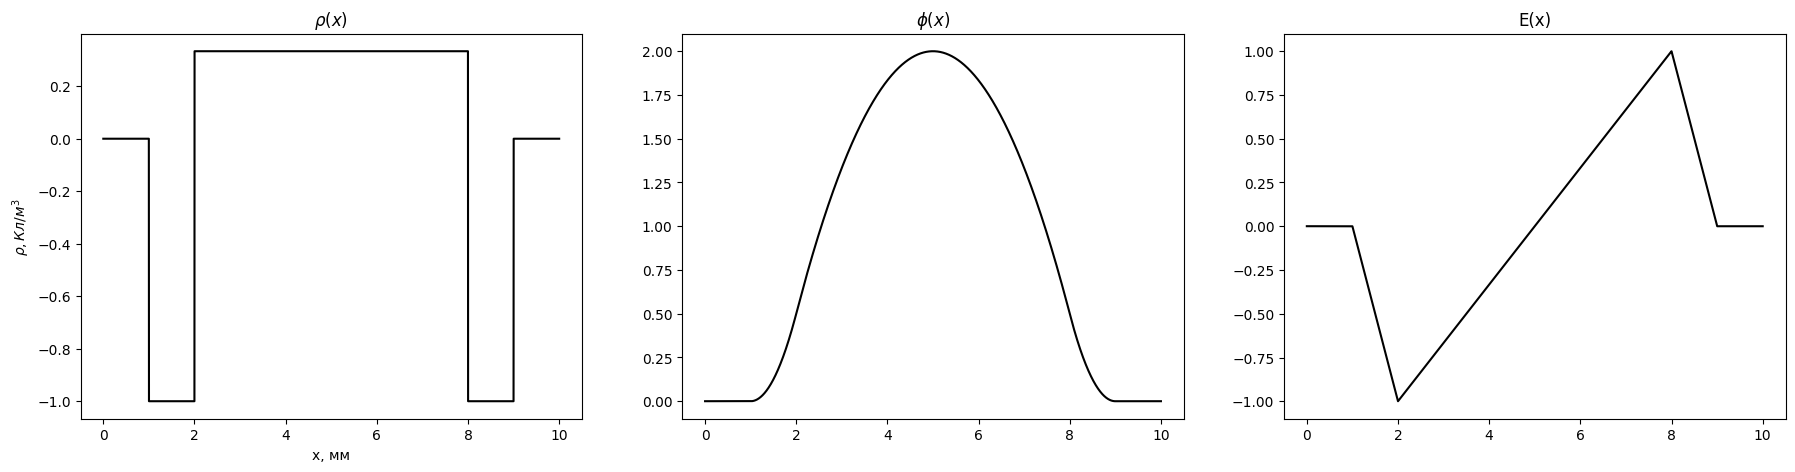

In [65]:
fig, ax = plt.subplots(1, 3)
ax[0].plot(grid, nodes.rho, color = "k") 
ax[0].set_title(r'$\rho (x)$')
ax[0].set_xlabel('x, мм')
ax[0].set_ylabel(r'$\rho, Кл/м^3$')

ax[1].plot(grid, nodes.phi, color = "k") 
ax[1].set_title(r'$\phi (x)$')

ax[2].plot(grid, nodes.E, color = "k") 
ax[2].set_title('E(x)')

fig.set_size_inches((22, 5))
%matplotlib inline

In [66]:
phi_theory = grid.copy()
phi_theory[:1000] = 0
phi_theory[1000:2000] = np.power(phi_theory[1000:2000] - 1, 2)/2
phi_theory[2000:8000] = 2 - np.power(phi_theory[2000:8000] - 5, 2)/6
phi_theory[8000:9000] = np.power(phi_theory[8000:9000] - 9, 2)/2
phi_theory[9000:] = 0

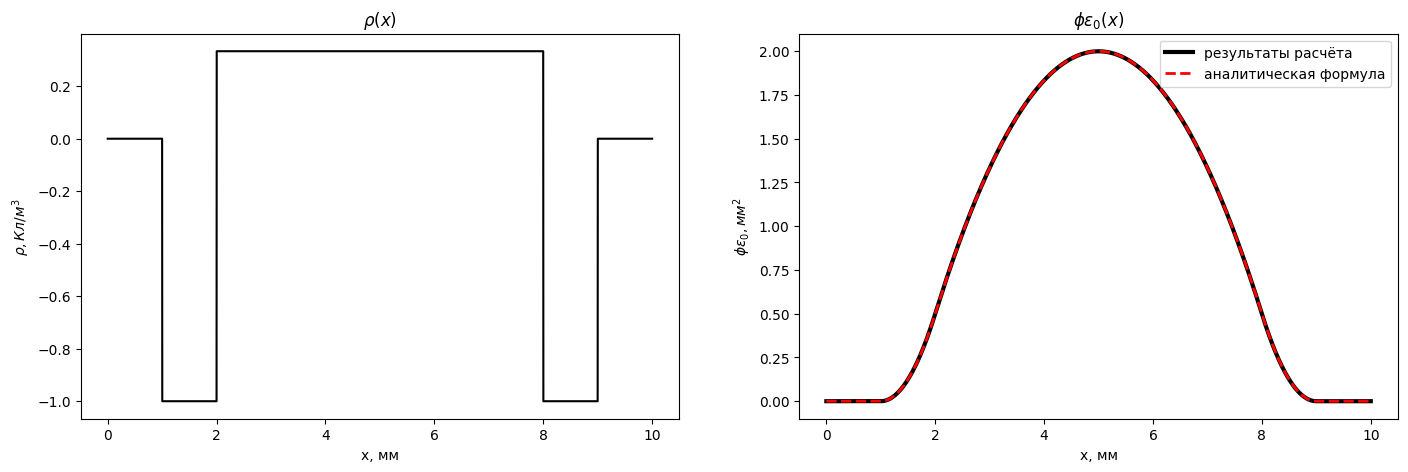

In [67]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(grid, nodes.rho, color = "k") 
ax[0].set_title(r'$\rho (x)$')
ax[0].set_xlabel('x, мм')
ax[0].set_ylabel(r'$\rho, Кл/м^3$')

ax[1].plot(grid, nodes.phi, color = "k", linewidth = 3, label='результаты расчёта') 
ax[1].plot(grid, phi_theory, color = "r", linewidth = 2, linestyle = '--', label='аналитическая формула') 
ax[1].set_xlabel('x, мм')
ax[1].set_ylabel(r'$\phi \epsilon_0, мм^2$')
ax[1].set_title(r'$\phi \epsilon_0 (x)$')
ax[1].legend()

fig.set_size_inches((17, 5))
%matplotlib inline

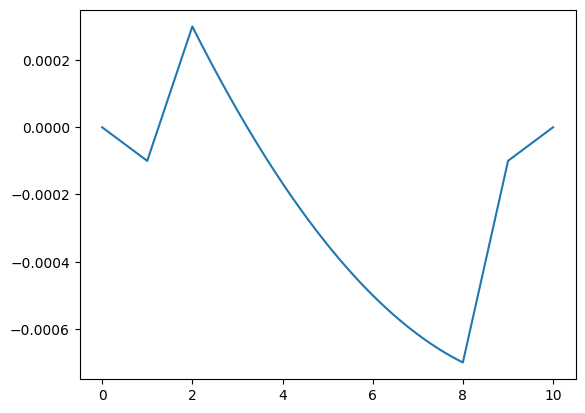

In [74]:
plt.plot(grid, (nodes.phi-phi_theory))

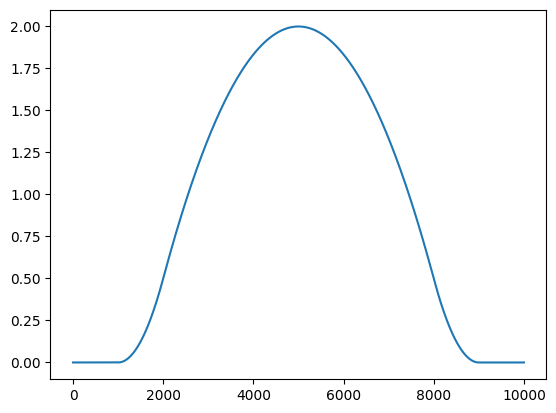

In [69]:
plt.plot(phi_theory)

In [70]:
print('Погрешности:')
print(f'в точке x = 5 мм.: {(1-nodes.phi[int(N_x*0.5)]/2)*100}%')
print(f'в точке x = 8 мм.: {(1-nodes.phi[int(N_x*0.8)]/0.5)*100}%')


Погрешности:
в точке x = 5 мм.: 0.017499999327441618%
в точке x = 8 мм.: 0.13999599779465077%


In [71]:
def smooth_step(N_x: int, left: float, right: float):
    ''' 
    Returns smoothed step between right and left values as N_x/100-points np.array 
    using transformed sigmoid function
    '''
    microgrid = np.linspace(-10, 10, int(N_x/100))
    res = 1/(1+np.exp(-microgrid))
    res = left + res*(right-left)

    return res